In [1]:
#House sale Data Predication
#Importing libraries
#If error is shown install required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor 
from sklearn import metrics

In [41]:
house_sale = pd.read_csv('house_data.csv')# Take data from kaggle and put directory link

In [42]:
house_sale.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,Parking_type,condition,grade,sqft_above,sqft_basement,City_type,zipcode,lat,long
0,7129300520,20141013T000000,221900,3,1.00,1180.0,5650.0,1.0,Open,3,7.0,1180.0,0.0,CAT B,98178,47.5112,-122.257
1,6414100192,20141209T000000,538000,3,2.25,2570.0,7242.0,2.0,Not Provided,3,7.0,2170.0,400.0,CAT B,98125,47.7210,-122.319
2,5631500400,20150225T000000,180000,2,1.00,770.0,10000.0,1.0,Not Provided,3,6.0,770.0,0.0,CAT A,98028,47.7379,-122.233
3,2487200875,20141209T000000,604000,4,3.00,1960.0,5000.0,1.0,Covered,5,7.0,1050.0,910.0,CAT B,98136,47.5208,-122.393
4,1954400510,20150218T000000,510000,3,2.00,1680.0,8080.0,1.0,Not Provided,3,8.0,1680.0,0.0,CAT B,98074,47.6168,-122.045


In [43]:
house_sale.shape

(21613, 17)

In [44]:
house_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21610 non-null  float64
 5   sqft_living    21594 non-null  float64
 6   sqft_lot       21595 non-null  float64
 7   floors         21613 non-null  float64
 8   Parking_type   21613 non-null  object 
 9   condition      21613 non-null  int64  
 10  grade          21612 non-null  float64
 11  sqft_above     21593 non-null  float64
 12  sqft_basement  21592 non-null  float64
 13  City_type      21613 non-null  object 
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
dtypes: float64(9), int64(5), object(3)
memory usage: 2

In [45]:
house_sale.isnull().sum()# Find null data in each column

id                0
date              0
price             0
bedrooms          0
bathrooms         3
sqft_living      19
sqft_lot         18
floors            0
Parking_type      0
condition         0
grade             1
sqft_above       20
sqft_basement    21
City_type         0
zipcode           0
lat               0
long              0
dtype: int64

In [48]:
house_sale['sqft_living'].fillna(house_sale['sqft_living'].mean(), inplace=True)#replace Null Values with mean value of other data respective column
house_sale['sqft_lot'].fillna(house_sale['sqft_lot'].mean(), inplace=True)
house_sale['sqft_above'].fillna(house_sale['sqft_above'].mean(), inplace=True)
house_sale['sqft_basement'].fillna(house_sale['sqft_basement'].mean(), inplace=True)
house_sale['bathrooms'].fillna(house_sale['bathrooms'].mean(), inplace=True)
house_sale['grade'].fillna(house_sale['grade'].mean(), inplace=True)

In [49]:
house_sale.isnull().sum()#check data again. No null data found

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
Parking_type     0
condition        0
grade            0
sqft_above       0
sqft_basement    0
City_type        0
zipcode          0
lat              0
long             0
dtype: int64

In [50]:
house_sale.describe() # statistics of all numerical data column 

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,zipcode,lat,long
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114808,2079.952765,1.510068e+04,1.494309,3.409430,7.656904,1788.274209,291.649917,98077.939805,47.560053,-122.213896
std,2.876566e+09,3.673622e+05,0.930062,0.770050,917.859458,4.139595e+04,0.539989,0.650743,1.175450,827.700462,442.443738,53.505026,0.138564,0.140828
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,1.000000,290.000000,0.000000,98001.000000,47.155900,-122.519000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1430.000000,5.042000e+03,1.000000,3.000000,7.000000,1190.000000,0.000000,98033.000000,47.471000,-122.328000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,3.000000,7.000000,1560.000000,0.000000,98065.000000,47.571800,-122.230000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.070800e+04,2.000000,4.000000,8.000000,2210.000000,560.000000,98118.000000,47.678000,-122.125000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,5.000000,13.000000,9410.000000,4820.000000,98199.000000,47.777600,-121.315000


In [52]:
house_sale['Parking_type'].value_counts()#checking same type of words

Open            8624
Not Provided    5273
Covered         4356
No Parking      3360
Name: Parking_type, dtype: int64

In [53]:
house_sale.replace({'Parking_type': {'No Parking':'Not Provided'}}, inplace=True)#replacing same type of words with one of them

In [54]:
house_sale['Parking_type'].value_counts()

Not Provided    8633
Open            8624
Covered         4356
Name: Parking_type, dtype: int64

In [55]:
house_sale['City_type'].value_counts()

CAT B    8472
CAT A    7613
CAT C    5528
Name: City_type, dtype: int64

In [56]:
encoder = LabelEncoder()#changing the object datatype into integer data type because ML does not allow regression on object data type

In [57]:
house_sale['Parking_type'] = encoder.fit_transform(house_sale['Parking_type'])#changing object data type into integer data type

house_sale['City_type'] = encoder.fit_transform(house_sale['City_type'])

In [58]:
sns.set() #High-level interface for drawing attractive and informative statistical graphics.


E:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


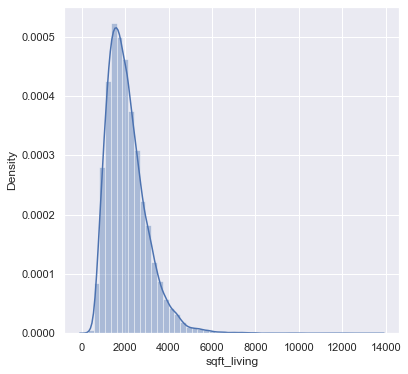

In [59]:
plt.figure(figsize=(6,6)) #Ploting graph for Taxi Dist
sns.distplot(house_sale['sqft_living'])
plt.show()

E:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


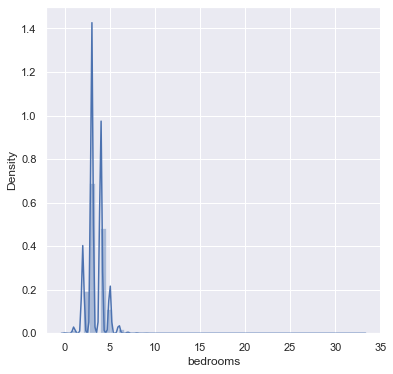

In [60]:
plt.figure(figsize=(6,6))#Ploting graph for Market dist
sns.distplot(house_sale['bedrooms'])
plt.show()

E:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


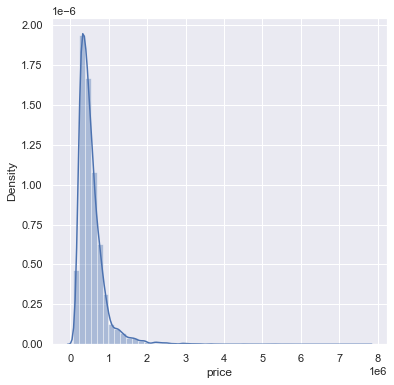

In [61]:
plt.figure(figsize=(6,6))#Ploting graph for Price house
sns.distplot(house_sale['price'])
plt.show()

In [62]:
house_sale['Parking_type'].value_counts()#checking same type of words

1    8633
2    8624
0    4356
Name: Parking_type, dtype: int64

In [63]:
house_sale.head()#Top five entry are visible of the dataset

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,Parking_type,condition,grade,sqft_above,sqft_basement,City_type,zipcode,lat,long
0,7129300520,20141013T000000,221900,3,1.00,1180.0,5650.0,1.0,2,3,7.0,1180.0,0.0,1,98178,47.5112,-122.257
1,6414100192,20141209T000000,538000,3,2.25,2570.0,7242.0,2.0,1,3,7.0,2170.0,400.0,1,98125,47.7210,-122.319
2,5631500400,20150225T000000,180000,2,1.00,770.0,10000.0,1.0,1,3,6.0,770.0,0.0,0,98028,47.7379,-122.233
3,2487200875,20141209T000000,604000,4,3.00,1960.0,5000.0,1.0,0,5,7.0,1050.0,910.0,1,98136,47.5208,-122.393
4,1954400510,20150218T000000,510000,3,2.00,1680.0,8080.0,1.0,1,3,8.0,1680.0,0.0,1,98074,47.6168,-122.045


In [64]:
house_sale.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,Parking_type,condition,grade,sqft_above,sqft_basement,City_type,zipcode,lat,long
21608,263000018,20140521T000000,360000,3,2.50,1530.0,1131.0,3.0,2,3,8.0,1530.0,0.0,0,98103,47.6993,-122.346
21609,6600060120,20150223T000000,400000,4,2.50,2310.0,5813.0,2.0,1,3,8.0,2310.0,0.0,1,98146,47.5107,-122.362
21610,1523300141,20140623T000000,402101,2,0.75,1020.0,1350.0,2.0,1,3,7.0,1020.0,0.0,2,98144,47.5944,-122.299
21611,291310100,20150116T000000,400000,3,2.50,1600.0,2388.0,2.0,1,3,8.0,1600.0,0.0,1,98027,47.5345,-122.069
21612,1523300157,20141015T000000,325000,2,0.75,1020.0,1076.0,2.0,2,3,7.0,1020.0,0.0,2,98144,47.5941,-122.299


In [65]:
X = house_sale.drop(columns=['id','date','lat','long','zipcode','price'],axis=2)#droping  house price column from the dataset
Y = house_sale['price']#putting  House price(output) column in Y axis

In [66]:
print(X)

       bedrooms  bathrooms  sqft_living  sqft_lot  floors  Parking_type  \
0             3       1.00       1180.0    5650.0     1.0             2   
1             3       2.25       2570.0    7242.0     2.0             1   
2             2       1.00        770.0   10000.0     1.0             1   
3             4       3.00       1960.0    5000.0     1.0             0   
4             3       2.00       1680.0    8080.0     1.0             1   
...         ...        ...          ...       ...     ...           ...   
21608         3       2.50       1530.0    1131.0     3.0             2   
21609         4       2.50       2310.0    5813.0     2.0             1   
21610         2       0.75       1020.0    1350.0     2.0             1   
21611         3       2.50       1600.0    2388.0     2.0             1   
21612         2       0.75       1020.0    1076.0     2.0             2   

       condition  grade  sqft_above  sqft_basement  City_type  
0              3    7.0      1180.0

In [67]:
print(Y)

0        221900
1        538000
2        180000
3        604000
4        510000
          ...  
21608    360000
21609    400000
21610    402101
21611    400000
21612    325000
Name: price, Length: 21613, dtype: int64


In [68]:
#Evaluation

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)#dividing X and Y into train and test data set

In [70]:
print(X.shape, X_train.shape, X_test.shape)

(21613, 11) (17290, 11) (4323, 11)


In [71]:
regressor = XGBRegressor()#calling XGBRegressor.

In [72]:
regressor.fit(X_train, Y_train)#fitting training data set

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [73]:
training_data_prediction = regressor.predict(X_train)# check prediction of train data set

In [74]:
r2_train = metrics.r2_score(Y_train, training_data_prediction)# find r2 scored using actual output and prediction

In [75]:
print('R Squared value = ', r2_train)

R Squared value =  0.8613913740679403


In [76]:
test_data_prediction = regressor.predict(X_test)# check prediction of test data set

In [77]:
r2_test = metrics.r2_score(Y_test, test_data_prediction)#find r2 scored using actual output and prediction

In [78]:
print('R Squared value = ', r2_test)

R Squared value =  0.6642923100912913


In [79]:
print(test_data_prediction[0:5])#expected sales prediction

[ 677061.56  380729.22 1034103.56  516328.16  317130.44]


In [80]:
X_test.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,Parking_type,condition,grade,sqft_above,sqft_basement,City_type
15544,4,2.75,2790.0,6600.0,2.0,1,3,9.0,2790.0,0.0,1
17454,3,2.25,1630.0,6449.0,1.0,1,3,7.0,1310.0,320.0,1
21548,2,1.50,2370.0,184231.0,2.0,1,3,11.0,2370.0,0.0,1
3427,4,2.50,2270.0,7665.0,2.0,2,3,9.0,2270.0,0.0,0
8809,3,1.00,1430.0,7599.0,1.5,1,4,6.0,1010.0,420.0,2


In [81]:
Y_test.head()#actual sales

15544     459000
17454     445000
21548    1060000
3427      732350
8809      235000
Name: price, dtype: int64

In [82]:
from sklearn.linear_model import Ridge

In [83]:
ridge_reg = Ridge(alpha=50, max_iter=100, tol=0.1)


In [84]:
ridge_reg.fit(X_train, Y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [85]:
ridge_reg.score(X_train, Y_train)

0.5597127124445646

In [86]:
ridge_reg.score(X_test, Y_test)

0.5622198860217431